#### New to Plotly?
Plotly's Python library is free and open source! [Get started](https://plot.ly/python/getting-started/) by downloading the client and [reading the primer](https://plot.ly/python/getting-started/).
<br>You can set up Plotly to work in [online](https://plot.ly/python/getting-started/#initialization-for-online-plotting) or [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode, or in [jupyter notebooks](https://plot.ly/python/getting-started/#start-plotting-online).
<br>We also have a quick-reference [cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) (new!) to help you get started!

#### Basic Tree-Plot in Plotly with [igraph](http://igraph.org/python/)

In [7]:
import plotly
plotly.tools.set_credentials_file(username='luzai', api_key='k5Kvp2WSSRfLY7rp0pWp')

import plotly.plotly as py
import plotly.graph_objs as go

import igraph
from igraph import *
igraph.__version__

#### Set Up Tree with [igraph](http://igraph.org/python/)

from datasets.cifar100 import *
# mapping

In [26]:
nr_vertices = 101
v_label = map(str, range(nr_vertices))
# G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
G=g=Graph()
g.add_vertex('root')
ind=0
for k in mapping.keys():
#     if k==7:break
    g.add_vertex('coarse'+str(k))
    g.add_edge('root','coarse'+str(k,))
    for kkk in mapping[k]:
#         kk=mapp[str(kk_)]
        kk=ind
        ind+=1
        g.add_vertex(str(kk))
        g.add_edge('coarse'+str(k),str(kk))
lay = G.layout('rt',3)

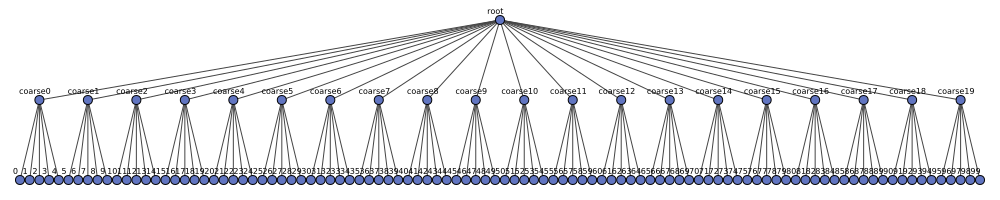

In [28]:
visual_style = dict(vertex_label_dist=1.5,vertex_label_angle=90,
                   autocurve=True,bbox=(1000,200),vertex_label_size=8)
visual_style["vertex_size"] = 9
visual_style["vertex_color"]='#6175c1'
visual_style['layout']=lay
visual_style["vertex_label"] = g.vs["name"]
plot(G,"tree.png",**visual_style)

In [36]:

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None] 
    
labels = v_label

#### Create Plotly Traces

In [37]:
lines = go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   )
dots = go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='',
                  marker=dict(symbol='dot',
                                size=18, 
                                color='#6175c1',    #'#DB4551', 
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  )

#### Create Text Inside the Circle via Annotations

In [38]:
def make_annotations(pos, text, font_size=10, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = go.Annotations()
    for k in range(L):
        annotations.append(
            go.Annotation(
                text=labels[k], # or replace labels with a different list for the text within the circle  
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations  

#### Add Axis Specifications and Create the Layout

In [39]:
axis = dict(showline=False, # hide axis line, grid, ticklabels and  title
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            )

layout = dict(title= 'Tree with Reingold-Tilford Layout',  
              annotations=make_annotations(position, v_label),
              font=dict(size=12),
              showlegend=False,
              xaxis=go.XAxis(axis),
              yaxis=go.YAxis(axis),          
              margin=dict(l=40, r=40, b=85, t=100),
              hovermode='closest',
              plot_bgcolor='rgb(248,248,248)'          
              )

#### Plot!

In [40]:
data=go.Data([lines, dots])
fig=dict(data=data, layout=layout)
fig['layout'].update(annotations=make_annotations(position, v_label))
py.iplot(fig, filename='Tree-Reingold-Tilf')

#### Reference
See https://plot.ly/python/reference/ for more information and chart attribute options and http://igraph.org/python/ for more information about the igraph package!